## Importing the libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("myexcel.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


## pre-processing of the dataset

In [4]:
df.drop_duplicates()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [5]:
df['Height']=np.random.randint(150,181,size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,175,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,158,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,167,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,176,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,167,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,180,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,167,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,152,231,Kansas,947276.0


## How many are there in each Team and the percentage splitting with respect to the total employees.

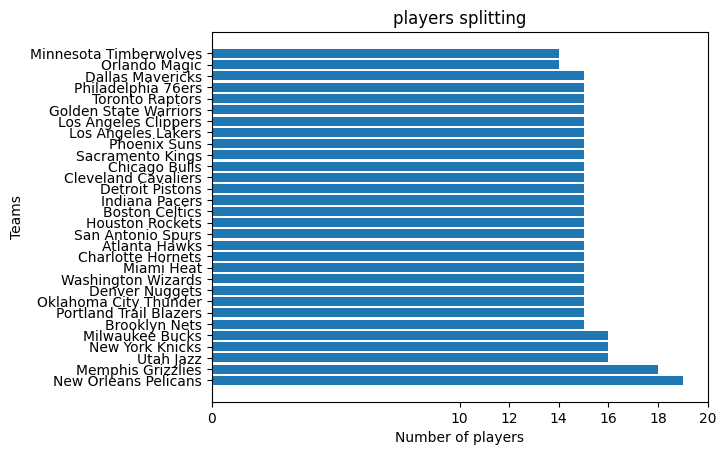

In [6]:
player_count_in_teams=df['Team'].value_counts()
plt.barh(player_count_in_teams.index,player_count_in_teams.values)
plt.xlabel("Number of players")
plt.ylabel("Teams")
plt.xticks([0,10,12,14,16,18,20])
plt.title("players splitting")
plt.show()


## Segregate the employees w.r.t different positions.

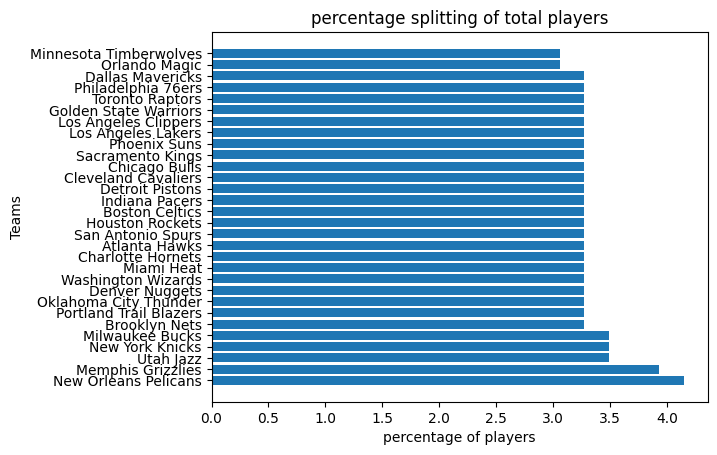

In [7]:
percentage_splitting=(player_count_in_teams/len(df))*100
plt.barh(percentage_splitting.index,percentage_splitting.values)
plt.xlabel("percentage of players")
plt.ylabel("Teams")
plt.title("percentage splitting of total players")
plt.show()

Number of players in different positions are:


Text(0.5, 1.0, 'Employee Position Distribution')

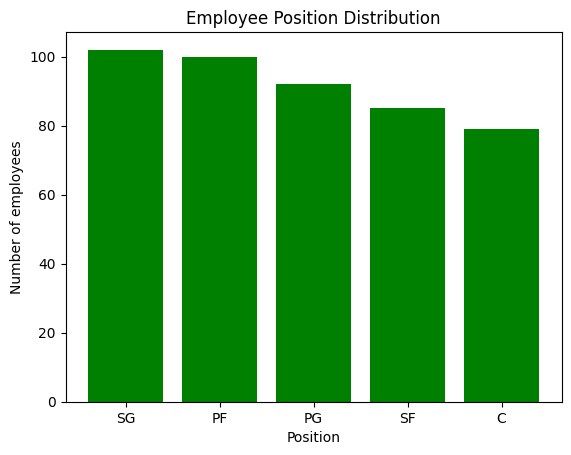

In [8]:
Position_data = df.groupby(['Position','Name']).sum()
position_count=df['Position'].value_counts()
print("Number of players in different positions are:")
plt.bar(position_count.index,position_count.values,color='green')
plt.xlabel("Position")
plt.ylabel("Number of employees")
plt.title("Employee Position Distribution")

## Find from which age group most of the employees belong to.

Different age group of players are:


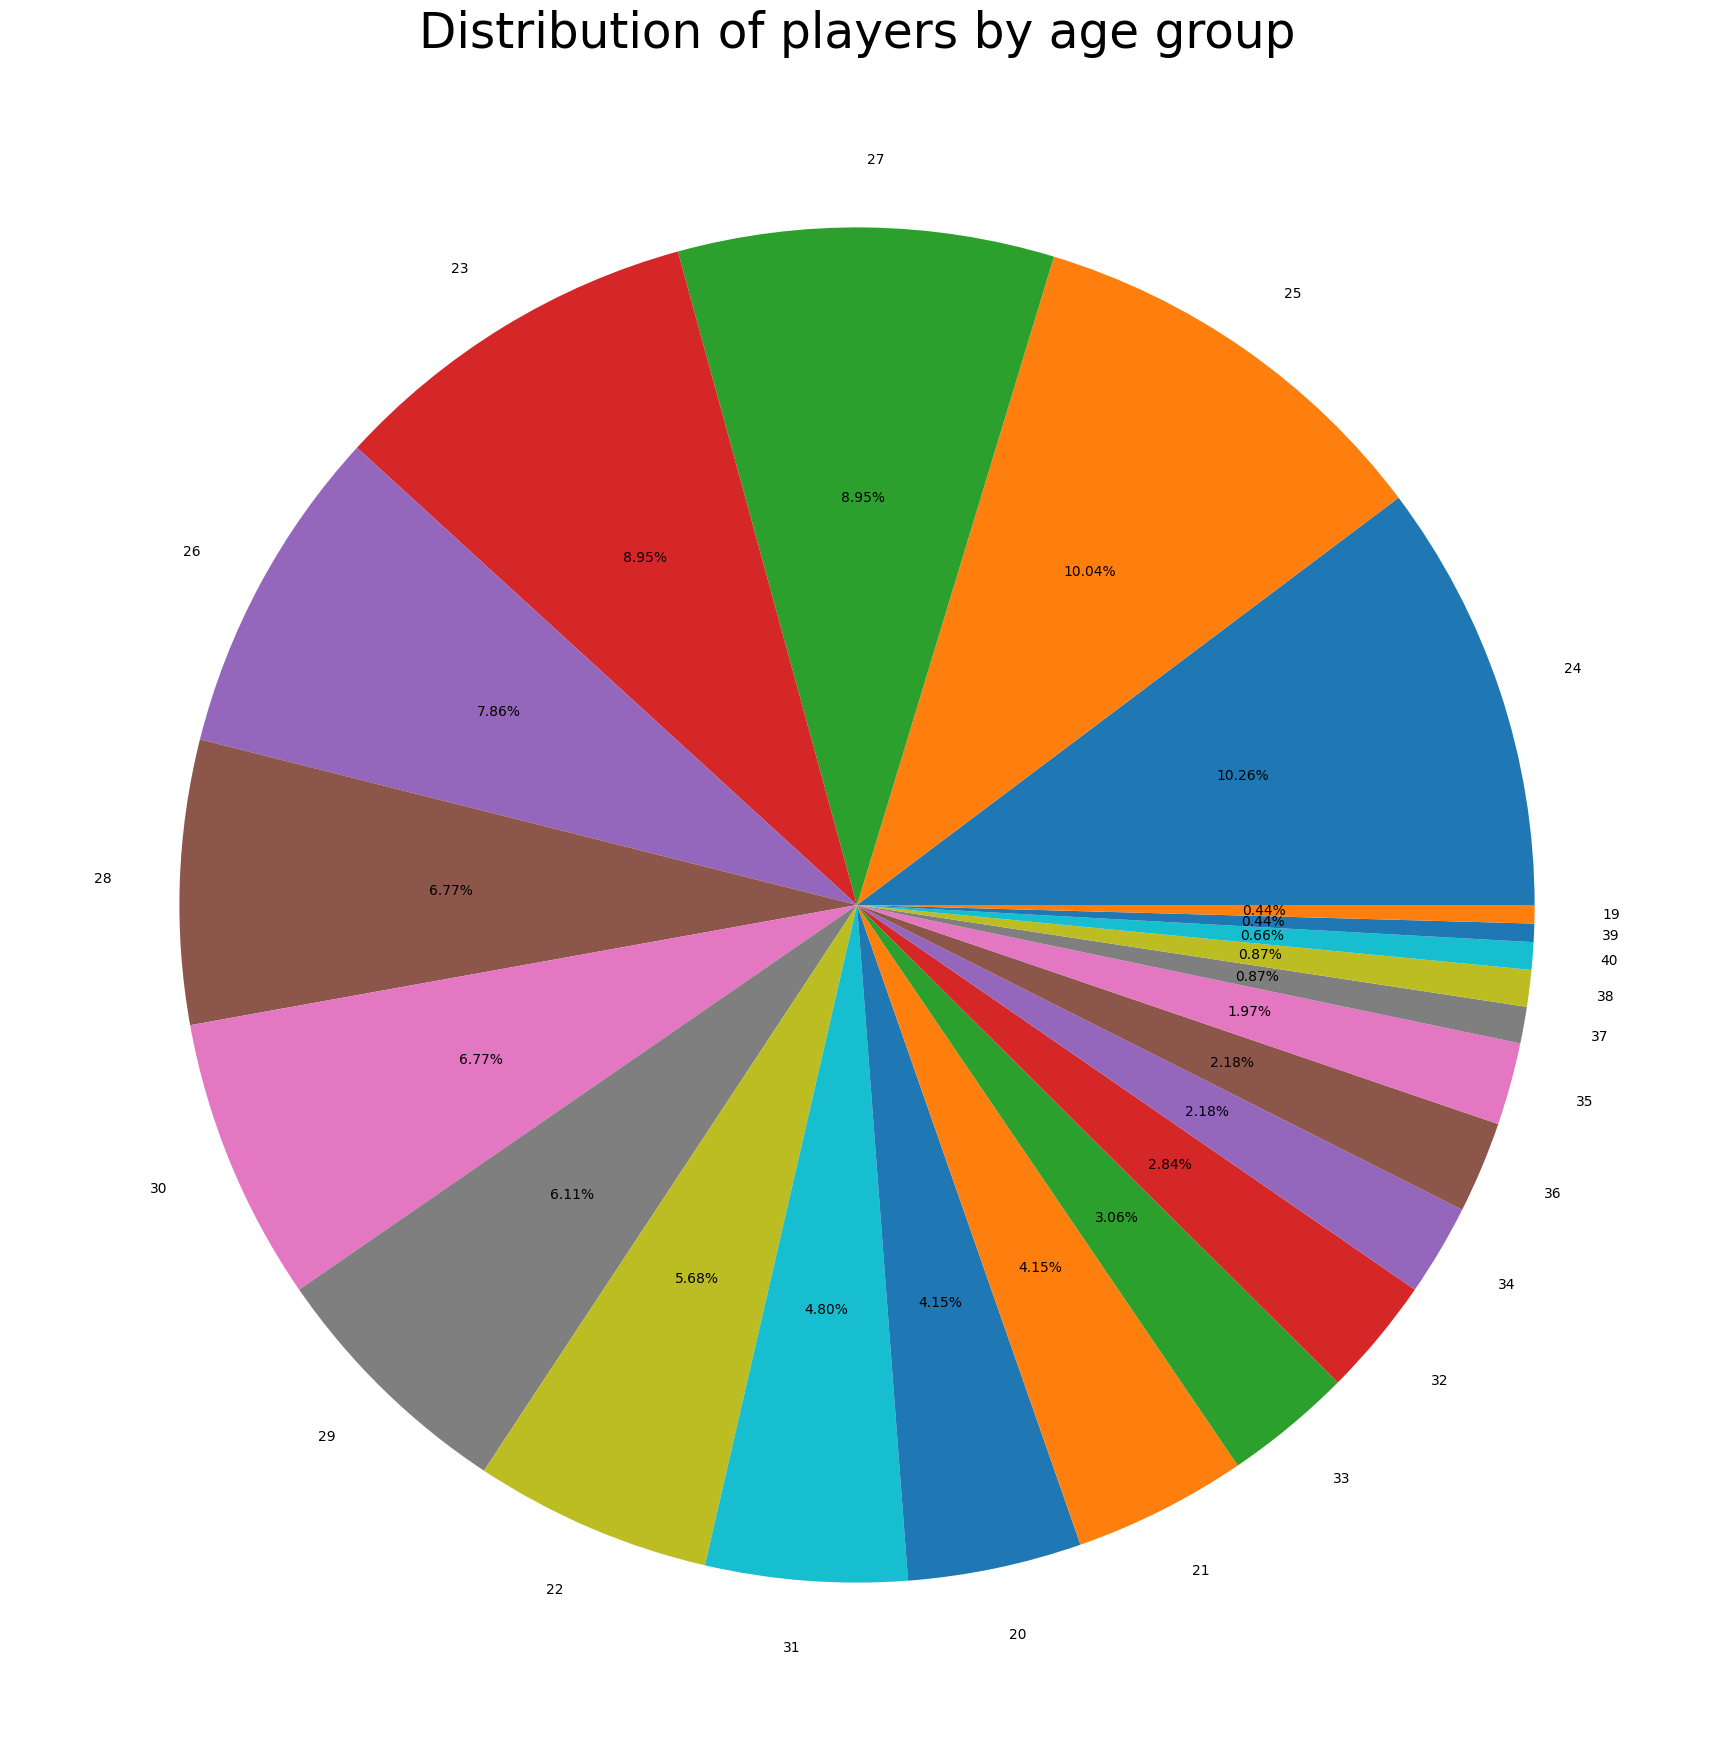

From the fig,we can identify that most of the employees belong to age group of 24


In [13]:
age_group = df["Age"].value_counts()
print("Different age group of players are:")
age_max=age_group.head(1).index
plt.figure(figsize=(22,22))
plt.pie(age_group,labels=age_group.index,autopct='%0.2f%%',radius=1)
plt.title("Distribution of players by age group",size=35)
plt.show()
print("From the fig,we can identify that most of the employees belong to age group of",age_max[0])

## Find out under which team and position, spending in terms of salary is high.

In [14]:
team_salary=df.groupby(['Team','Position'])['Salary'].sum()
Highest_salary = team_salary.idxmax()
print("Highest salary is in:",Highest_salary)
print("The {} team and {} player position is spending high in terms of salary!".format (Highest_salary[0],Highest_salary[1]))

Highest salary is in: ('Los Angeles Lakers', 'SF')
The Los Angeles Lakers team and SF player position is spending high in terms of salary!


## Find if there is any correlation between age and salary , represent it visually.

The correlation between age and salary is 0.2140094122657097


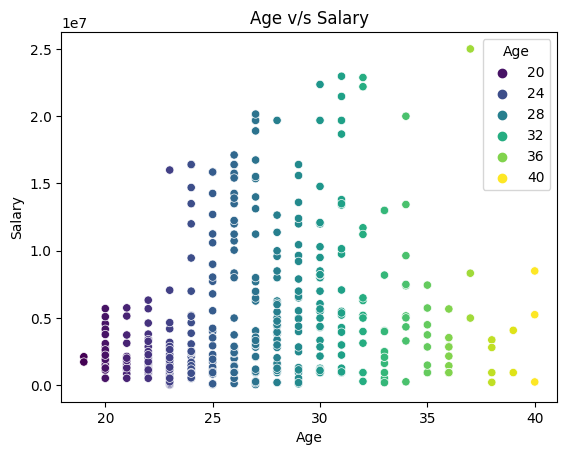

In [15]:
correlation=df['Age'].corr(df["Salary"])
print("The correlation between age and salary is",correlation)


age=df['Age']
salary=df['Salary']
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age v/s Salary")
sns.scatterplot(x=age,y=salary,hue=age,palette='viridis')
plt.show()

Although no linear relationship can be observed between the age and salary of players based on the scatter plot above, it is evident that as age increases, certain players with more experience in the field tend to have higher salaries.